# Interpolación

Es un método matématico para construir una función a partir de un conjunto discreto de puntos. La función interpoladora, debe coincidir **exactamente** con cada uno de los valores de los puntos dados y también puede ser evaluada para otro conjunto de valores intermedios entre el conjunto de puntos iniciales. 

Consideremos el caso de interpolación en una dimension, el cual puede formularse como:

* Para un conjunto de $n$ valores $\lbrace (x_i,y_i) \rbrace_{i=1}~{n}$, debe encontrarse una función $f(x)$ tal que $f(x_i)=y_i$ para todo $i\in [1,n]$. 

La función $f(x)$ se conoce como la función interpoladora.  tipicamente podemos escribir la función interpoladora como una combinacion lineal de funciones bases $\phi_{j}(x)$, es decir:

* Se tiene que $f(x)=\sum_{j=1}^{n}c_j \phi_{j}(x)$ donde $c_j$ son coeficentes desconocidos. Sustituyendo los puntos conocidos en esta combilacion linela resulta en un sistema de ecuaciones lineales $\sum_{j=1}^{n}c_j \phi_{j}(x)=y_{i}$. El cual puede escribirse de forma matricial

$
\left[\begin{array}{cccc}
\phi_1(x_1)&\phi_2(x_1)&\dots&\phi_n(x_1)\\
\phi_1(x_2)&\phi_2(x_2)&\dots&\phi_n(x_2)\\
\vdots&\vdots&\vdots&\vdots&\\
\phi_1(x_3)&\phi_2(x_3)&\dots&\phi_n(x_3)
\end{array}
\right]
\left[\begin{array}{c}
c_1\\
c_2\\
\vdots\\
c_n
\end{array}
\right]
=
\left[\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}
\right]
$


* La elección de las funciones base afecta las propiedades del sistema de ecuaciones y una elección adecuada de las funciones bases depende de las caracteristicas de los datos que estan siendo interpolados.

* Algunas funciones bases son los polinomios de Legendre, Chebyshev o secciones de polinomios. En general, $f(x)$ no es única, pero para un conjunto de $n$ puntos existe un único polinomio interpolador de orden $n-1$, sin importar que funciones bases fueron consideradas. 

Antes de pasar a revisar algunos ejemplos de interpolación revisemos algunas herramientas que nos permiten construir polinomios.

In [1]:
import numpy as np

In [8]:
np.polynomial?

In [5]:
p1 = np.polynomial.Polynomial([1,2,3])

In [6]:
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

Las raíces de un polinomio son todos los $x_i$ tal que $P(x_i)=0 = y_i$

**domain:** *array like, optional* 

Es el dominio del polinomio. El intervalo $[domain[0],domain[1]]$ es mapeado al intervalo $[window[0],window[1]]$, es decir se escala el intervalo domain al intervalo de *window*. Valor default $[-1,1]$

**window:** *array like, optional* 

Véase *domain*. Valor default $[-1,1]$

Es decir, *domain* esta asociado al dominio del conjunto de puntos a interpolar

In [28]:
p1 = np.polynomial.Polynomial([1,2,3], domain =[-2,2], window = [-2,2])

In [29]:
x,y=p1.linspace()

In [30]:
x,y

(array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
        -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
        -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
        -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
        -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
        -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
        -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
        -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
        -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
        -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
         0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
         0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
         0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
         0.62626263,  0.66666667,  0.70707071,  0.7

In [31]:
import matplotlib.pyplot as plt

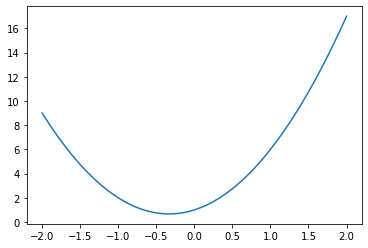

In [32]:
plt.plot(x,y)

También podemos construir un polinomio a partir de las raices.

In [37]:
p_r1 = np.polynomial.Polynomial.fromroots([-1,1], domain = [-2,2], window = [-2,2])

In [38]:
p_r1

Polynomial([-1.,  0.,  1.], domain=[-2.,  2.], window=[-2.,  2.])

In [39]:
x_r,y_r = p_r1.linspace()

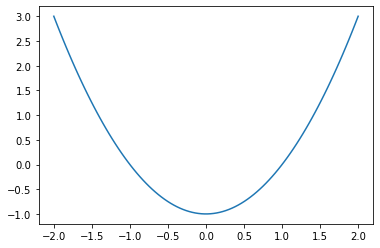

In [40]:
plt.plot(x_r,y_r)

También podemos construir un polinomio del cual conocemos mas de 2 raíces

In [41]:
p_r2 =  np.polynomial.Polynomial.fromroots([-1,1,2,3,4], domain = [-1,4], window = [-1,4])

In [42]:
p_r2

Polynomial([ 24., -26., -15.,  25.,  -9.,   1.], domain=[-1.,  4.], window=[-1.,  4.])

In [47]:
x_r2,y_r2 = p_r2.linspace()
x_d,y_d = np.array([-1,1,2,3,4]),np.array([0,0,0,0,0])

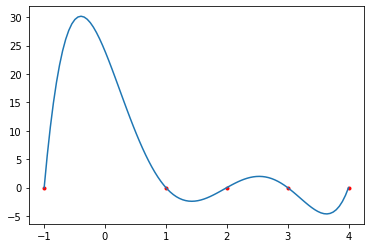

In [49]:
plt.plot(x_d,y_d,"r.")
plt.plot(x_r2,y_r2)

Si conocemos el polinomio podemos encontar sus raíces con el método *roots*

In [51]:
p1

Polynomial([1., 2., 3.], domain=[-2.,  2.], window=[-2.,  2.])

In [50]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [52]:
p_r2.roots()

array([-1.,  1.,  2.,  3.,  4.])

Se puede acceder a las propiedades de un polinomio con lo siguientes métodos:

In [53]:
p1.coef

array([1., 2., 3.])

In [54]:
p1.domain

array([-2.,  2.])

In [55]:
p1.window

array([-2.,  2.])

El polinomio creado con *Polynomial* puede ser evaluado en puntos deseados, por ejemplo $x=\{ 1.5,2.5,3.5\}$

In [56]:
x_set = np.array([1.5,2.5,3.5])

In [57]:
p1(x_set)

array([10.75, 24.75, 44.75])

Podemos realizar las operaciones básicas

In [58]:
p1//p1

Polynomial([1.], domain=[-2.,  2.], window=[-2.,  2.])

In [59]:
p_r2

Polynomial([ 24., -26., -15.,  25.,  -9.,   1.], domain=[-1.,  4.], window=[-1.,  4.])

In [64]:
p_r3 = np.polynomial.Polynomial.fromroots([2],domain = [-1,4], window = [-1,4])
p_r3

Polynomial([-2.,  1.], domain=[-1.,  4.], window=[-1.,  4.])

In [67]:
p_div = p_r2//p_r3
p_div

Polynomial([-12.,   7.,  11.,  -7.,   1.], domain=[-1.,  4.], window=[-1.,  4.])

In [70]:
p_r2.roots()

array([-1.,  1.,  2.,  3.,  4.])

In [69]:
p_div.roots()

array([-1.,  1.,  3.,  4.])

## Interpolación de polinomios

Recordemos que $f(x)=\sum_{j=1}^{n}c_j \phi_{j}(x)$ donde $c_j$ son coeficentes desconocidos. Sustituyendo los puntos conocidos en esta combinación lineal resulta en un sistema de ecuaciones lineales $\sum_{j=1}^{n}c_j \phi_{j}(x)=y_{i}$. El cual puede escribirse de forma matricial como $\Phi(x)c=y$, donde

$\Phi(x)c=y$

$
\left[\begin{array}{cccc}
\phi_1(x_1)&\phi_2(x_1)&\dots&\phi_n(x_1)\\
\phi_1(x_2)&\phi_2(x_2)&\dots&\phi_n(x_2)\\
\vdots&\vdots&\vdots&\vdots&\\
\phi_1(x_3)&\phi_2(x_3)&\dots&\phi_n(x_3)
\end{array}
\right]
\left[\begin{array}{c}
c_1\\
c_2\\
\vdots\\
c_n
\end{array}
\right]
=
\left[\begin{array}{c}
y_1\\
y_2\\
\vdots\\
y_n
\end{array}
\right]
$

Resolviendo esta ecuación matricial podemos obtener la función que interpola un conjunto de puntos dado.

## Ejemplo:

Consideremos el conjunto de puntos $(1,1), (2,3), (3,5)$ y $(4,4)$. Encuentre una función que interpole los puntos anteriores.

In [71]:
x_coord = np.array([1,2,3,4])
y_coord = np.array([1,3,5,4])

Recordemos que para interpolar un polinomio en un conjunto de $n$ datos es necesario un polinomio de grado $n-1$. Entonces, considerando las funciones base como $x^i$, queremos encontrar los coeficientes $c_i$ tal que $f(x) =  \sum_{i=1}^{i=4}c_ix^{i-1} = c_1x^0+c_2x^1+c_3x^2+c_4x^3$

In [75]:
deg = len(x_coord)-1
A = np.polynomial.polynomial.polyvander(x_coord,deg)
A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

es decir, que la fucnción interpoladora es:

In [76]:
c = np.linalg.solve(A,y_coord)
c

array([ 2. , -3.5,  3. , -0.5])

In [92]:
f1 = np.polynomial.Polynomial(c, domain = [-1,5], window = [-1,5])

In [93]:
f1

Polynomial([ 2. , -3.5,  3. , -0.5], domain=[-1.,  5.], window=[-1.,  5.])

In [94]:
x,y = f1.linspace()

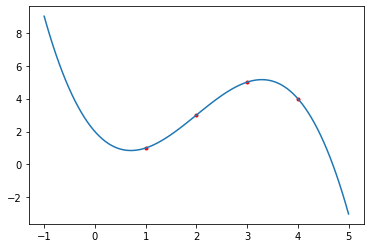

In [95]:
plt.plot(x_coord,y_coord,"r.")
plt.plot(x,y)

La cual puede ser usada para evaluar en algún  punto del dominio

In [87]:
f1(0.75)

0.8515625

# Tarea 5

1.- Considerando la ecuación de onda en dos dimensiones

$
\dfrac{\partial^2 u}{\partial t^2} =c^2\left(\dfrac{\partial^2 u}{\partial x^2} +\dfrac{\partial^2 u}{\partial y^2}\right)
$

cuya condición inicial es $u_{i,j}^{n=0}= exp(-0.5(x-Lx/2.0)^2 - 0.5(y-Ly/2.0)^2)$, donde el dominio $D$ de la PDE es el cuadrado de longitud $L=10$ y $u(\partial D)=0$ para todo $t$.

Encuentra $u$ para $n=0,1,2\dots,10$ y grafica con el método *subplots* cada una de las soluciones. Hint: Usa los mismo parametros que vimos en clase.
    
2.-Investiga la definicion de los polinomios de Chebyshev y explica brevemente como se construyen.
* Considerando el ejemplo visto en clase, interpola los puntos $(1,1), (2,.3), (3,5)$ y $(4,4)$ utilizando como función base los polinomios de Chebyshev. Hint: revisa el módulo numpy.polynomial.chebyshev.chebvander


3.- Grafica los puntos a interpolar, la funcion interpoladora encontrada utilizando como funciones base potencias $x$ (relizado en clase) y la que encontraste utilizando polinomios de Chebyshev. ¿Que puede decir de lo que se observa en la gráfica?